<h1>Data Science Nanodegree by Udacity </h1>

<h2>First Project </h2>

<h2>In this project I will use student score performance dataset. The dataset has been downloaded from Kaggle, and you can find it in this link <a href = 'https://www.kaggle.com/adithyabshetty100/student-performance'>dataset</a> </h2>


#### I want to analyze in this project the factors that contribute in positive manner in student performance, whether it can be measured or not 



<h3>Table of Content </h3>
<ol>
<strong> 
<li>
Business Understanding

</li>


<li>
Data Understanding

</li>
<li>
Data Preparation

</li>
<li>
Data Modeling

</li>
<li>
Data Visualization


</li>
<li>
Result Evaluation & Conclusion
</li>

</strong> 
</ol>

#Business Understanding 






1.   Does parent educational background urge their childern to complete test prepartion course
2.   Who has better score performance based on gender
3.   Whether test preparation course increase the student score
4.   Is race and ethnicity play important role in student's performance
5.   Is parent educational background effect student's performance



In [ ]:
#import necessary libraires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data Understadning

##### Explore the columns, and some statistics

In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
pd.set_option('display.max_rows', 140)
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

# Data Preparation


##### After Exploring the data, and finding that the scores is somehow similar, so I decided to sum the whole scores together then put them in one column, and take the average of them, to make the analysis more interpretable.  

In [ ]:
df['Score_total'] = df['math score'] + df['reading score'] + df['writing score']

In [ ]:
df['Score'] = df['Score_total'] / 3

In [ ]:
df.Score = df.Score.astype(int)

In [ ]:
df.drop(columns=['math score','reading score','writing score','Score_total'], inplace = True)

In [ ]:
df.rename(columns={'Score':'score'},inplace = True)

# Data Modeling

##### Data splitting (training, and testing), convert categorical variables into dummy variable, Machine Learning Model Creation (Linear Regression), fitting the model to the training set, making predictions in the test set, then calculating the r2 score in the training and testing sets.

In [ ]:
y = df['score']
X = df.drop(columns='score')

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.shape

(1000, 17)

In [ ]:
y.shape

(1000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

pred = reg.predict(X_test)

print('Training Set R2 Score : ' , reg.score(X_train,y_train))



print('Testing Set R2 Score : ' , r2_score(y_test,pred))

Training Set R2 Score :  0.23723591545563294
Testing Set R2 Score :  0.21573092268050986


# Data Visualization

##### Visualize the data that we want answer on them

In [ ]:
def createHeatMap(x,y,title):

      """ 
    Create Heat Map from two variables
  
    Parameters: 
    x: Column (Series) that will be displayed in x-axis of the heatmap
    y: Column (Series) that will be displayed in y-axis of the heatmap
    title: The title that will be displayed alongside chart
    
    Returns: 
    Heat Map: With the specified parmaters in x-axis and y-axis
  
    """
      ct_counts = df.groupby([x, y]).size()
      ct_counts = ct_counts.reset_index(name='count')
      ct_counts = ct_counts.pivot(index = x, columns = y, values = 'count')
      plt.title(title)
      sb.heatmap(ct_counts, annot = True, fmt = 'd');


In [ ]:
def createBarChart(df,x,y,title):

    """ 
    Create Bar Chart from two variables
  
    Parameters:
    df: Targted dataFrame 
    x: Column (Series) that will be displayed in x-axis of the heatmap
    y: Column (Series) that will be displayed in y-axis of the heatmap
    title: The title that will be displayed alongside chart
    
    Returns: 
    Bar Chart: With the specified parmaters in dataframe, x-axis, y-axis, and the title
  
    """
    base_color = sb.color_palette()[0]
    sb.barplot(data=df, x=x, y=y, color=base_color);
    plt.xticks(rotation=15);
    plt.title(title);


Question 1: Does parent educational background urge their childern to complete test prepartion course


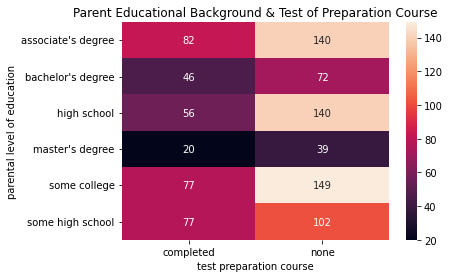

In [ ]:
#Heat Map creation to compre parent educational background with test of preparation course
createHeatMap('parental level of education','test preparation course','Parent Educational Background & Test of Preparation Course')

Question 2: Who has better score performance based on gender

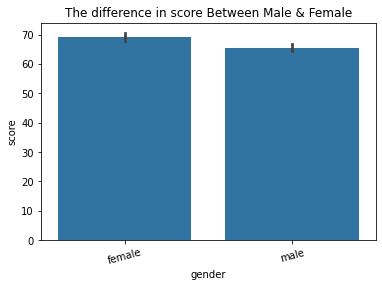

In [ ]:
#Bar Chart creation to show the The difference in score Between Male & Female
createBarChart(df,'gender','score','The difference in score Between Male & Female') 

Question 3: Whether test preparation course increase the student score

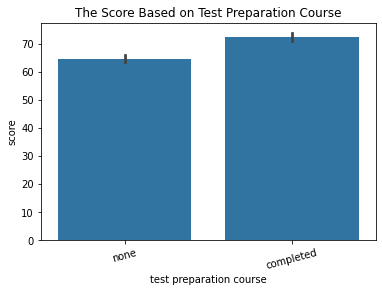

In [ ]:
#Bar Chart creation to show the The difference in score based on Test Preparation Course
createBarChart(df,'test preparation course','score','The Score Based on Test Preparation Course')
	

Question 4: Is race and ethnicity play important role in student's performance


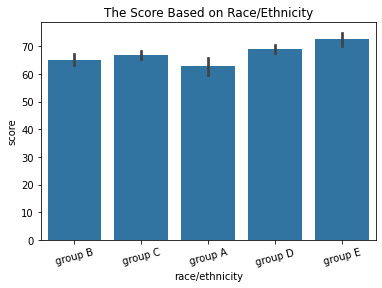

In [ ]:
#Bar Chart creation to show The difference in score based on Race/Ethnicity
createBarChart(df,'race/ethnicity','score','The Score Based on Race/Ethnicity')

Question 5: Is parent educational background effect student's performance

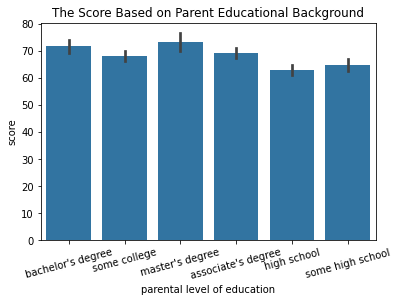

In [ ]:
#Bar Chart creation to show The difference in score based on Parent Educational Background
createBarChart(df,'parental level of education','score','The Score Based on Parent Educational Background')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,82
2,female,group B,master's degree,standard,none,92
3,male,group A,associate's degree,free/reduced,none,49
4,male,group C,some college,standard,none,76


# Result Evaluation & Conclusion


---


*   **If we take the percentage of the student's parent that has higher educational background their children tend to complete the test preparation course**
*   **As it shown in the bar chart female students has higher score than male students**

*   **The student that has completed the test preparation course has gained higher score**

*   **Race and Ethnicity effects is differ for each different group, and group (E) has the highest score with 5 marks difference from the second group, which is group (D)**

*   **higher educational background of the parents reflect positively in students score**
*   **I tested multiple regression models to predict the student score based on the other features, and the highest score was with Linear Regression due to simplicity of the algorithm itself, but the problem that the dataset contains little data, so the model is unable to predict well due to (Underfitting).**





